<a href="https://colab.research.google.com/github/shubham14yadav/Carmax_competition/blob/main/carmax_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CARMAX CONTEST

In [ ]:
# Import libraries
%matplotlib inline 
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Read dataset
df = pd.read_csv("ShowcaseDataWinter2023.csv")

In [ ]:
print("Shape", df.shape)
print("Columns", df.columns)

Shape (200000, 30)
Columns Index(['price', 'appraisal_offer', 'online_appraisal_flag', 'model_year',
       'mileage', 'make', 'model', 'trim_descrip', 'body', 'color', 'engine',
       'cylinders', 'mpg_city', 'mpg_highway', 'horsepower', 'fuel_capacity',
       'model_year_appraisal', 'mileage_appraisal', 'make_appraisal',
       'model_appraisal', 'trim_descrip_appraisal', 'body_appraisal',
       'color_appraisal', 'engine_appraisal', 'cylinders_appraisal',
       'mpg_city_appraisal', 'mpg_highway_appraisal', 'horsepower_appraisal',
       'fuel_capacity_appraisal', 'market'],
      dtype='object')


In [ ]:
df.head()

,price,appraisal_offer,online_appraisal_flag,model_year,mileage,make,model,trim_descrip,body,color,...,trim_descrip_appraisal,body_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market
0,$20k to $25k,$0k to $5k,1.0,2014.0,15k to 20k miles,HDT,HDT_12,Premium,E,Red,...,NaN,D,Silver,4.0L,6,17.0,21,236,21.0,13
1,$15k to $20k,$0k to $5k,0.0,2006.0,100k+ miles,KQZ,KQZ_23,Premium,E,Silver,...,Not Premium,D,Gold,4.2L,6,16.0,21,205,25.0,11
2,$30k to $35k,$35k to $40k,1.0,2014.0,5k to 10k miles,CZV,CZV_10,Premium,E,Black,...,NaN,E,Red,2.0L,4,41.0,38,181,10.0,13
3,$35k to $40k,$5k to $10k,1.0,2014.0,15k to 20k miles,IZA,IZA_19,Premium,F,Silver,...,Premium,F,Blue,3.0L,6,17.0,25,230,16.0,13
4,$30k to $35k,$15k to $20k,1.0,2011.0,35k to 40k miles,HDT,HDT_8,Premium,F,Blue,...,Not Premium,E,Black,2.4L,4,20.0,29,182,18.0,16


In [ ]:
df.describe()

,online_appraisal_flag,model_year,cylinders,mpg_city,mpg_highway,horsepower,fuel_capacity,model_year_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market
count,196166.000000,200000.000000,200000.000000,199410.000000,199410.000000,200000.000000,199996.000000,200000.000000,200000.000000,199999.000000,200000.000000,200000.000000,199688.000000,200000.000000
mean,0.252949,2012.563570,4.965780,22.172118,29.376671,236.973075,17.579302,2007.848445,5.072170,21.679143,29.209780,219.746690,17.565728,8.418455
std,0.434703,2.111069,1.389352,5.238446,5.678557,76.622682,4.322564,4.872934,1.329861,5.482760,6.061812,73.593995,4.401769,4.512525
min,0.000000,1991.000000,0.000000,11.000000,14.000000,11.000000,1.000000,1986.000000,3.000000,9.000000,13.000000,11.000000,7.000000,1.000000
25%,0.000000,2012.000000,4.000000,18.000000,25.000000,175.000000,14.000000,2005.000000,4.000000,18.000000,25.000000,168.000000,14.000000,5.000000
50%,0.000000,2013.000000,4.000000,22.000000,29.000000,228.000000,17.000000,2009.000000,4.000000,21.000000,29.000000,197.000000,17.000000,8.000000
75%,1.000000,2014.000000,6.000000,26.000000,33.000000,290.000000,19.000000,2012.000000,6.000000,25.000000,34.000000,278.000000,20.000000,12.000000
max,1.000000,2017.000000,16.000000,60.000000,59.000000,760.000000,48.000000,2017.000000,10.000000,60.000000,59.000000,760.000000,48.000000,16.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    200000 non-null  object 
 1   appraisal_offer          200000 non-null  object 
 2   online_appraisal_flag    196166 non-null  float64
 3   model_year               200000 non-null  float64
 4   mileage                  200000 non-null  object 
 5   make                     200000 non-null  object 
 6   model                    200000 non-null  object 
 7   trim_descrip             176159 non-null  object 
 8   body                     189741 non-null  object 
 9   color                    199967 non-null  object 
 10  engine                   200000 non-null  object 
 11  cylinders                200000 non-null  int64  
 12  mpg_city                 199410 non-null  float64
 13  mpg_highway              199410 non-null  float64
 14  hors

In [ ]:
#Finding null
df.isnull().sum()

price                      0
appraisal_offer            0
online_appraisal_flag      0
model_year                 0
mileage                    0
make                       0
model                      0
trim_descrip               0
body                       0
color                      0
engine                     0
cylinders                  0
mpg_city                   0
mpg_highway                0
horsepower                 0
fuel_capacity              0
model_year_appraisal       0
mileage_appraisal          0
make_appraisal             0
model_appraisal            0
trim_descrip_appraisal     0
body_appraisal             0
color_appraisal            0
engine_appraisal           0
cylinders_appraisal        0
mpg_city_appraisal         0
mpg_highway_appraisal      0
horsepower_appraisal       0
fuel_capacity_appraisal    0
market                     0
dtype: int64

In [ ]:
[features for features in df.columns if df[features].isnull().sum()>0]

['online_appraisal_flag',
 'mpg_city',
 'mpg_highway',
 'fuel_capacity',
 'mpg_city_appraisal',
 'fuel_capacity_appraisal']

In [ ]:
df = df.dropna(how='any',axis=0) 

<AxesSubplot:>

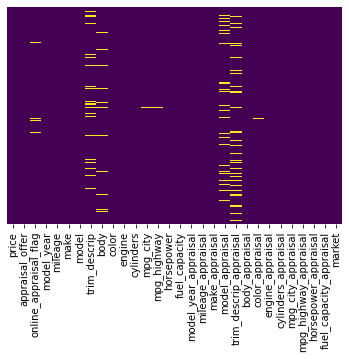

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#Most sold car model
model_index=df.model.value_counts().index
model_val=df.model.value_counts().values

(array([6.7225e+04, 4.7104e+04, 4.3769e+04, 2.2989e+04, 9.4230e+03,
        3.4430e+03, 1.0960e+03, 1.1320e+03, 1.0950e+03, 9.2300e+02,
        5.9800e+02, 4.0900e+02, 2.8000e+02, 2.4300e+02, 1.3200e+02,
        9.6000e+01, 4.3000e+01]),
 array([  0.        ,  33.76470588,  67.52941176, 101.29411765,
        135.05882353, 168.82352941, 202.58823529, 236.35294118,
        270.11764706, 303.88235294, 337.64705882, 371.41176471,
        405.17647059, 438.94117647, 472.70588235, 506.47058824,
        540.23529412, 574.        ]),
 <BarContainer object of 17 artists>)

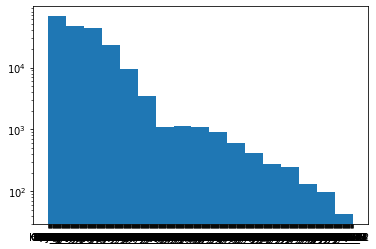

In [ ]:
#Histogram of car model
plt.hist(df['model'], bins=17,log=True)

([<matplotlib.patches.Wedge at 0x261c2984d90>,
 [Text(1.0192224871169104, 0.41374572113221836, 'HXQ_8'),
  Text(0.482677213838321, 0.9884445898689901, 'ARU_4'),
  Text(-0.25449865828521356, 1.0701543967722724, 'AIH_13'),
  Text(-0.8712151197618292, 0.6715535831922735, 'CFK_8'),
  Text(-1.0999933091870744, -0.0038366318131471512, 'HXQ_14'),
  Text(-0.8811886266089771, -0.6584121842242782, 'HXQ_10'),
  Text(-0.3303738436724883, -1.0492154799739977, 'AIH_5'),
  Text(0.30628300539827313, -1.056499276196724, 'BZQ_4'),
  Text(0.8025816073744553, -0.7522385017427891, 'KQZ_3'),
  Text(1.066236115635685, -0.2704450881678687, 'LTX_20')],
 [Text(0.5559395384274056, 0.22567948425393725, '12.27%'),
  Text(0.2632784802754478, 0.5391515944739945, '10.99%'),
  Text(-0.13881744997375284, 0.5837205800576031, '10.90%'),
  Text(-0.47520824714281584, 0.36630195446851277, '10.76%'),
  Text(-0.5999963504656768, -0.0020927082617166275, '10.25%'),
  Text(-0.48064834178671473, -0.35913391866778804, '10.07%'),
 

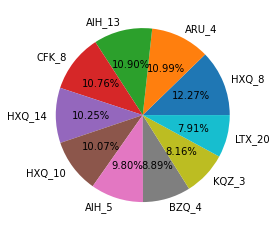

In [ ]:
plt.pie(model_val[:10],labels=model_index[:10],autopct="%1.2f%%")

In [ ]:
#Most sold car color
color_index=df.color.value_counts().index
color_val=df.color.value_counts().values
df.color.value_counts()

White       45198
Black       42936
Gray        39395
Silver      24654
Blue        19745
Red         14240
Burgundy     3609
Brown        2674
Green        2133
Gold         1278
Orange       1177
Tan          1109
Pearl        1045
Purple        497
Yellow        273
Unknown         4
Name: color, dtype: int64

In [ ]:
features=df.groupby(['body','color','engine','cylinders']).size().reset_index().rename(columns={0:'Count'})

In [ ]:
features

,body,color,engine,cylinders,Count
0,A,Black,1.4L,4,5
1,A,Black,1.5L,4,1
2,A,Black,1.6L,4,3
3,A,Black,1.6L,6,1
4,A,Black,1.8L,4,4
...,...,...,...,...,...
2098,G,White,3.6L,12,1
2099,G,White,3.7L,6,3
2100,G,White,4.0L,8,1
2101,G,White,4.8L,8,2


<AxesSubplot:xlabel='body', ylabel='Count'>

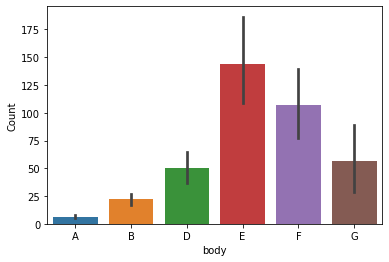

In [ ]:
sns.barplot(x="body", y="Count",data=features)

<AxesSubplot:xlabel='color', ylabel='Count'>

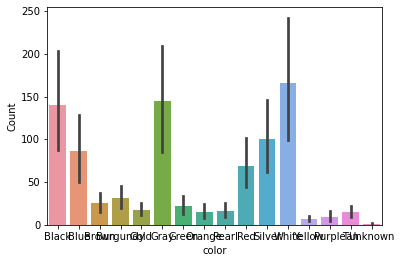

In [ ]:
sns.barplot(x="color", y="Count",data=features)

<AxesSubplot:xlabel='cylinders', ylabel='Count'>

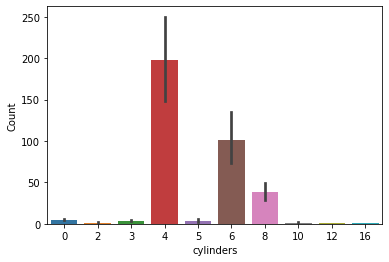

In [ ]:
sns.barplot(x="cylinders", y="Count",data=features)

In [ ]:
#Most sold cylinder type
cylinders_index=df.cylinders.value_counts().index
cylinders_val=df.cylinders.value_counts().values
df.cylinders.value_counts()

4     117052
6      62171
8      18628
0       1398
3        393
5        239
2         95
16        13
12         8
10         3
Name: cylinders, dtype: int64

<AxesSubplot:xlabel='cylinders', ylabel='count'>

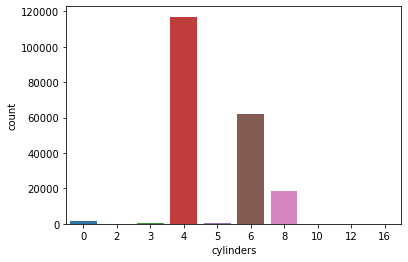

In [ ]:
sns.countplot(x='cylinders',data=df)

<AxesSubplot:xlabel='engine', ylabel='count'>

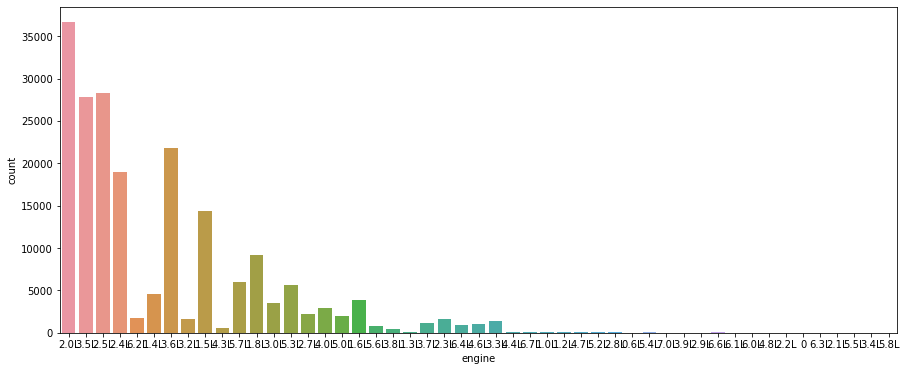

In [ ]:
plt.rcParams['figure.figsize']=(15,6)
sns.countplot(x='engine',data=df)

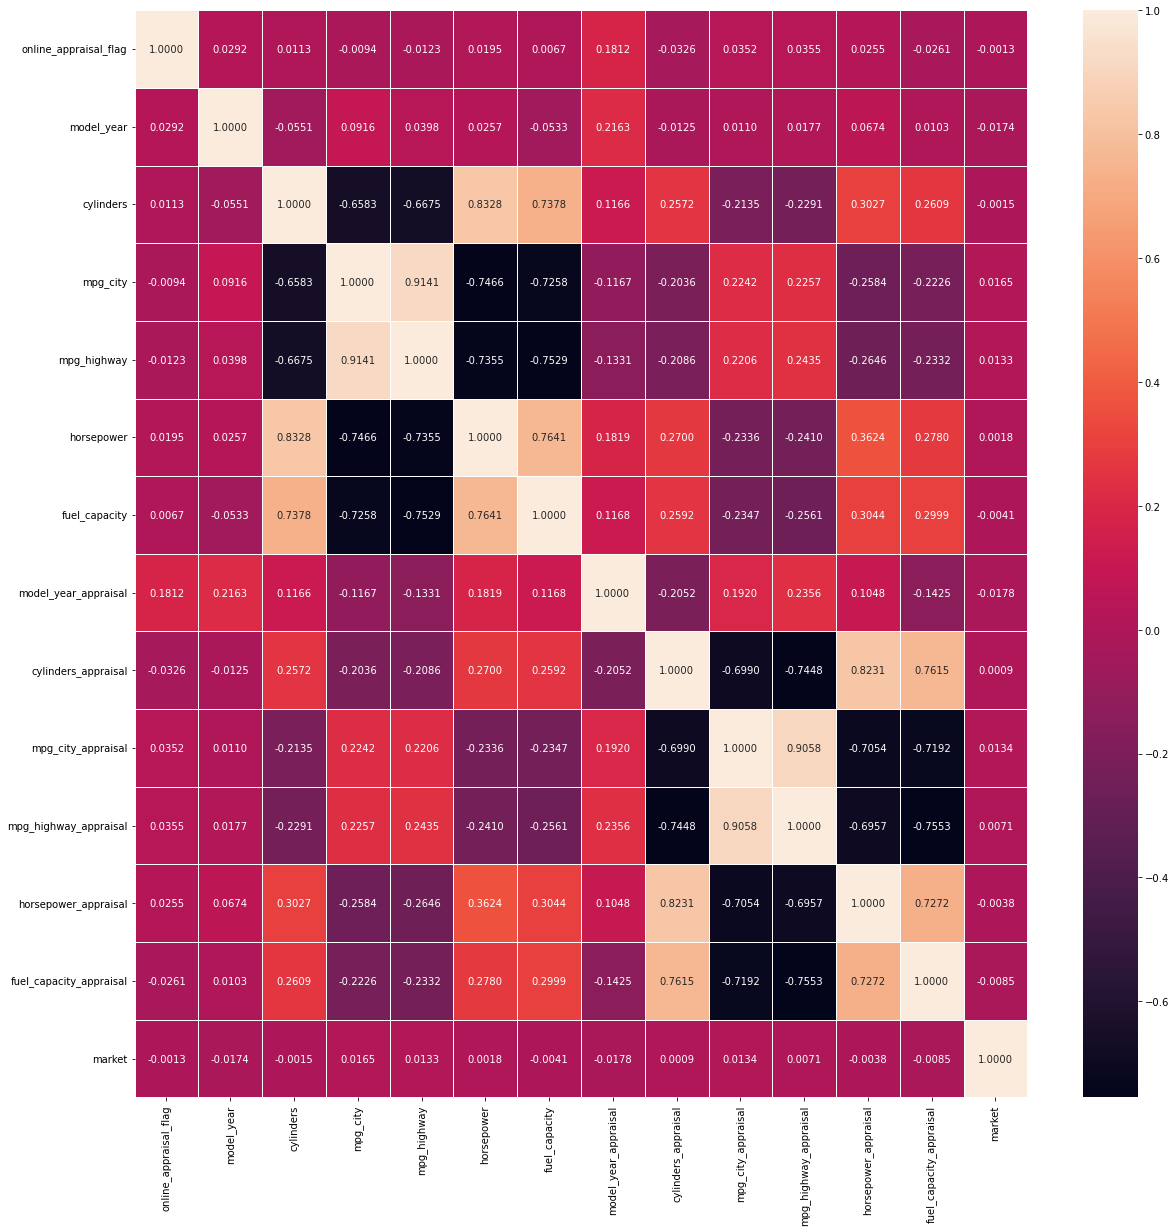

In [ ]:
#Correlation heatmap
f,ax= plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),linewidths=.5,annot=True,fmt='0.4f',ax=ax)
plt.show()

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
price_i=le.fit_transform(df['price'])
appraisal_offer_i=le.fit_transform(df['appraisal_offer'])
mileage_i=le.fit_transform(df['mileage'])
make_i=le.fit_transform(df['make'])
model_i=le.fit_transform(df['model'])
trim_descrip_i=le.fit_transform(df['trim_descrip'])
body_i=le.fit_transform(df['body'])
color_i=le.fit_transform(df['color'])
engine_i=le.fit_transform(df['engine'])
mileage_appraisal_i=le.fit_transform(df['mileage_appraisal'])
make_appraisal_i=le.fit_transform(df['make_appraisal'])
model_appraisal_i=le.fit_transform(df['model_appraisal'])
trim_descrip_appraisal_i=le.fit_transform(df['trim_descrip_appraisal'])
body_appraisal_i=le.fit_transform(df['body_appraisal'])
color_appraisal_i=le.fit_transform(df['color_appraisal'])
engine_appraisal_i=le.fit_transform(df['engine_appraisal'])

In [ ]:
price_i, appraisal_offer_i, mileage_i, make_i, model_i, trim_descrip_i, body_i, color_i, engine_i, mileage_appraisal_i, make_appraisal_i, model_appraisal_i, trim_descrip_appraisal_i, body_appraisal_i, color_appraisal_i, engine_appraisal_i

(array([2, 1, 4, ..., 4, 4, 8]),
 array([0, 0, 6, ..., 0, 1, 2]),
 array([ 3,  1, 12, ...,  2, 10, 12]),
 array([18, 28,  9, ...,  0, 28,  8]),
 array([230, 442, 151, ...,   4, 448, 133]),
 array([1, 1, 1, ..., 1, 0, 1]),
 array([3, 3, 3, ..., 4, 2, 3]),
 array([10, 11,  0, ..., 11,  0,  0]),
 array([ 9, 22, 14, ..., 14, 22, 30]),
 array([12,  0,  2, ...,  4,  5, 18]),
 array([ 0, 29,  8, ..., 20,  6, 12]),
 array([ 29, 540, 161, ..., 323, 127, 227]),
 array([2, 0, 2, ..., 0, 1, 1]),
 array([3, 3, 4, ..., 5, 3, 4]),
 array([11,  4, 10, ...,  5, 14,  1]),
 array([29, 31,  9, ..., 13, 44, 44]))

In [ ]:
df.drop("price",axis=1,inplace=True)
df.drop("appraisal_offer",axis=1,inplace=True)
df.drop("mileage",axis=1,inplace=True)
df.drop("make",axis=1,inplace=True)
df.drop("model",axis=1,inplace=True)
df.drop("trim_descrip",axis=1,inplace=True) 
df.drop("body",axis=1,inplace=True)
df.drop("color",axis=1,inplace=True)
df.drop("engine",axis=1,inplace=True)
df.drop("mileage_appraisal",axis=1,inplace=True)
df.drop("make_appraisal",axis=1,inplace=True)
df.drop("model_appraisal",axis=1,inplace=True)
df.drop("trim_descrip_appraisal",axis=1,inplace=True)
df.drop("body_appraisal",axis=1,inplace=True)
df.drop("color_appraisal",axis=1,inplace=True)
df.drop("engine_appraisal",axis=1,inplace=True)

In [ ]:
df["price"] = price_i
df["appraisal_offer"] = appraisal_offer_i
df["mileage"] = mileage_i
df["make"] = make_i
df["model"] = model_i
df["trim_descrip"] = trim_descrip_i
df["body"] = body_i
df["color"] = color_i
df["engine"] = engine_i
df["mileage_appraisal"] = mileage_appraisal_i
df["make_appraisal"] = make_appraisal_i
df["model_appraisal"] = model_appraisal_i
df["trim_descrip_appraisal"] = trim_descrip_appraisal_i
df["body_appraisal"] = body_appraisal_i
df["color_appraisal"] = color_appraisal_i
df["engine_appraisal"] = engine_appraisal_i

In [ ]:
df.head()

,online_appraisal_flag,model_year,cylinders,mpg_city,mpg_highway,horsepower,fuel_capacity,model_year_appraisal,cylinders_appraisal,mpg_city_appraisal,...,body,color,engine,mileage_appraisal,make_appraisal,model_appraisal,trim_descrip_appraisal,body_appraisal,color_appraisal,engine_appraisal
0,1.0,2014.0,4,27.0,33.0,152,16.0,2001.0,6,17.0,...,3,10,9,12,0,29,2,3,11,29
1,0.0,2006.0,6,19.0,27.0,285,18.0,1996.0,6,16.0,...,3,11,22,0,29,540,0,3,4,31
2,1.0,2014.0,4,24.0,30.0,187,15.0,2014.0,4,41.0,...,3,0,14,2,8,161,2,4,10,9
3,1.0,2014.0,4,25.0,34.0,255,15.0,2006.0,6,17.0,...,4,11,9,1,22,675,1,5,1,19
4,1.0,2011.0,4,17.0,23.0,305,15.0,2011.0,4,20.0,...,4,1,14,13,30,576,0,4,0,13


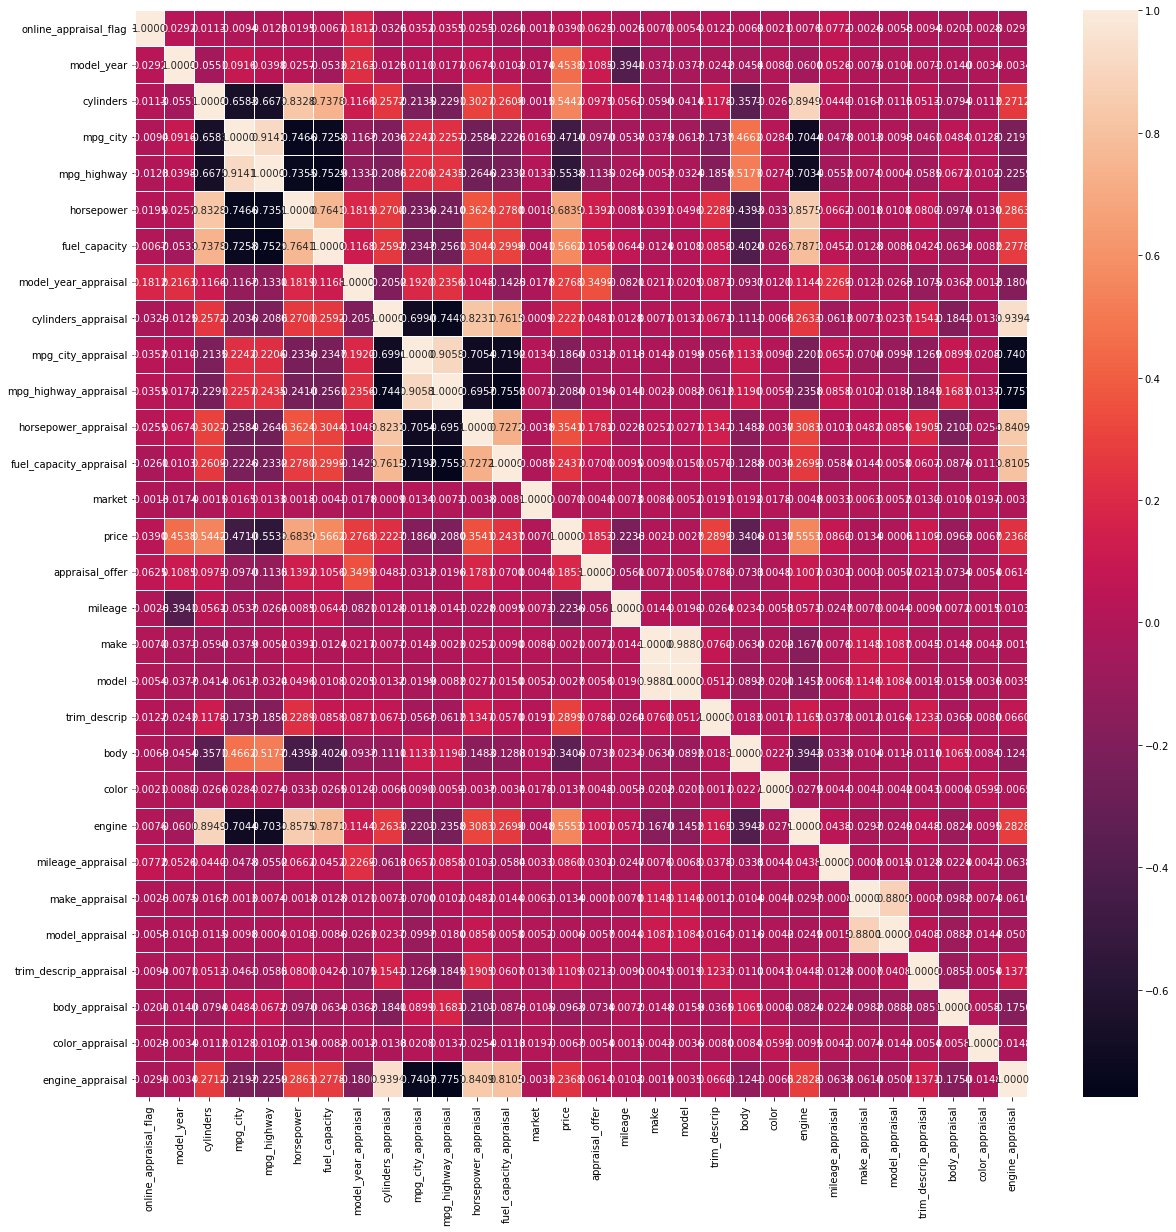

In [ ]:
#Correlation heatmap
f,ax= plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),linewidths=.5,annot=True,fmt='0.4f',ax=ax)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Load the data
data = df

# Select relevant features for clustering
X = data[['make_appraisal', 'model_year_appraisal', 'mileage_appraisal']]

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Predict the cluster for each data point
data['cluster'] = kmeans.predict(X)

# Analyze the clusters to identify patterns and trends in customer preferences
data['cluster']

0         1
1         2
2         1
3         2
4         0
         ..
199995    2
199996    0
199997    2
199998    1
199999    1
Name: cluster, Length: 200000, dtype: int32

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load your data
data = df

# select the relevant features
X = data[['model_year_appraisal', 'mileage_appraisal', 'make_appraisal', 'model_appraisal', 'color_appraisal', 'engine_appraisal', 'cylinders_appraisal', 'mpg_city_appraisal', 'mpg_highway_appraisal', 'horsepower_appraisal', 'fuel_capacity_appraisal']]
y = data['make']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier using the training data
clf.fit(X_train, y_train)

# Predict using the test data
y_pred = clf.predict(X_test)

# evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))


Accuracy:  0.15637881154151412


In [ ]:
print("The accuracy for training set is:",round(clf.score(X_train, y_train),4))
print("The accuracy for test set is:",round(clf.score(X_test,y_test),4))

The accuracy for training set is: 0.7822
The accuracy for test set is: 0.1564


In [ ]:
#Hyper-parameter Tuning for Decision Tree
# GridSearch + CV
from sklearn.model_selection import GridSearchCV

opt_tree = DecisionTreeClassifier(random_state = 0)
dt_params = {'max_depth':  range(1,10)         ,
             'min_samples_split':   range(2,11),
             'max_leaf_nodes':    range(2,11)   }

# 5 for depth, 8 for sample, 10 for leaf
grid_tree = GridSearchCV(opt_tree, dt_params)
grid_tree.fit(X_train, y_train)

C:\Users\vasaa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': range(2, 11)})

In [ ]:
# Report the best hyperparameters chosen
grid_tree.best_params_

In [ ]:
df.columns

Index(['online_appraisal_flag', 'model_year', 'cylinders', 'mpg_city',
       'mpg_highway', 'horsepower', 'fuel_capacity', 'model_year_appraisal',
       'cylinders_appraisal', 'mpg_city_appraisal', 'mpg_highway_appraisal',
       'horsepower_appraisal', 'fuel_capacity_appraisal', 'market', 'price',
       'appraisal_offer', 'mileage', 'make', 'model', 'trim_descrip', 'body',
       'color', 'engine', 'mileage_appraisal', 'make_appraisal',
       'model_appraisal', 'trim_descrip_appraisal', 'body_appraisal',
       'color_appraisal', 'engine_appraisal', 'cluster'],
      dtype='object')

In [ ]:
import pandas as pd

# load your data
data = df

# group the data by make and model of the appraised vehicles
grouped_data = data.groupby(['make_appraisal','model_appraisal']).size().reset_index(name='counts')

# sort the data by count in descending order
grouped_data = grouped_data.sort_values(by='counts', ascending=False)

# print the top 10 most commonly traded in makes and models
print(grouped_data.head(10))


    make_appraisal model_appraisal  counts
34             ARU          ARU_12    4068
227            HXQ          HXQ_14    3860
233            HXQ           HXQ_8    3730
6              AIH          AIH_13    3666
320            KQZ           KQZ_3    2905
321            KQZ           KQZ_4    2877
14             AIH          AIH_25    2814
425            OFW           OFW_6    2672
50             ARU           ARU_4    2667
348            LTX          LTX_20    2502


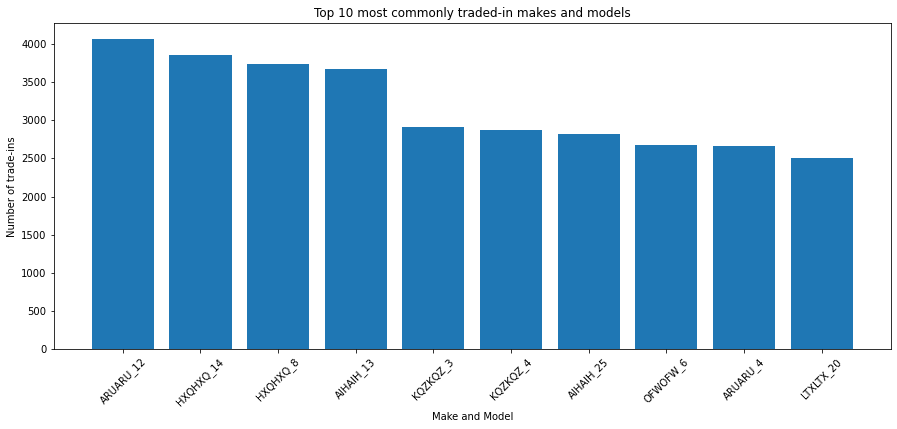

In [ ]:
import matplotlib.pyplot as plt

# load your data
data = df

# group the data by make and model of the appraised vehicles
grouped_data = data.groupby(['make_appraisal','model_appraisal']).size().reset_index(name='counts')

# sort the data by count in descending order
grouped_data = grouped_data.sort_values(by='counts', ascending=False)

# get the top 10 most commonly traded in makes and models
top_makes_models = grouped_data.head(10)

# create a bar chart
plt.bar(top_makes_models['make_appraisal'] + top_makes_models['model_appraisal'], top_makes_models['counts'])

# set the x-axis label
plt.xlabel("Make and Model")

# set the y-axis label
plt.ylabel("Number of trade-ins")

# set the title of the chart
plt.title("Top 10 most commonly traded-in makes and models")

# rotate the x-axis labels to make them more readable
plt.xticks(rotation=45)

# display the chart
plt.show()


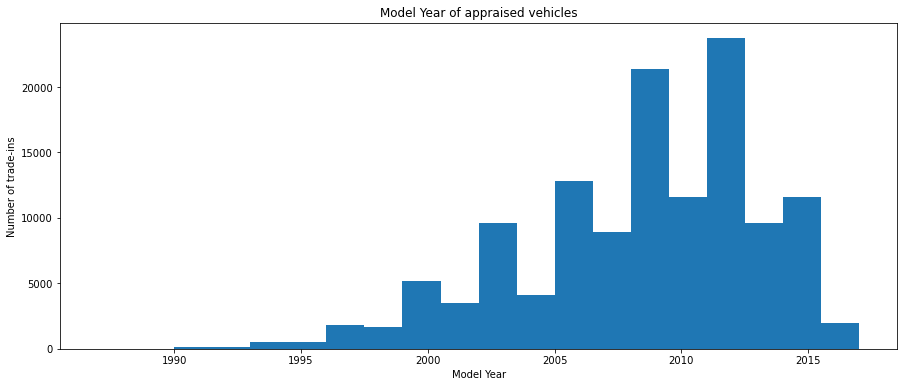

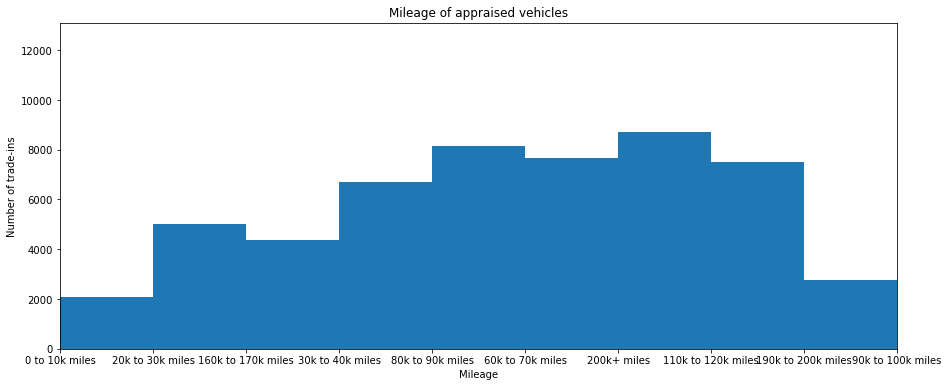

In [ ]:
import matplotlib.pyplot as plt

# load your data
data = df

# create a histogram of the model year of the appraised vehicles
plt.hist(data['model_year_appraisal'], bins=20)
plt.xlabel("Model Year")
plt.ylabel("Number of trade-ins")
plt.title("Model Year of appraised vehicles")
plt.show()

# create a histogram of the mileage of the appraised vehicles
plt.hist(data['mileage_appraisal'], bins=20)
plt.xlabel("Mileage")
plt.ylabel("Number of trade-ins")
plt.title("Mileage of appraised vehicles")
plt.xlim(0, data['mileage_appraisal'].max()) # increase the size of x axis
plt.show()


In [ ]:
#Looking at the body, color, engine, cylinders, and other features of the appraised vehicles to identify customer preferences for specific features. This information can be used to inform the dealership's inventory and sales pitch.


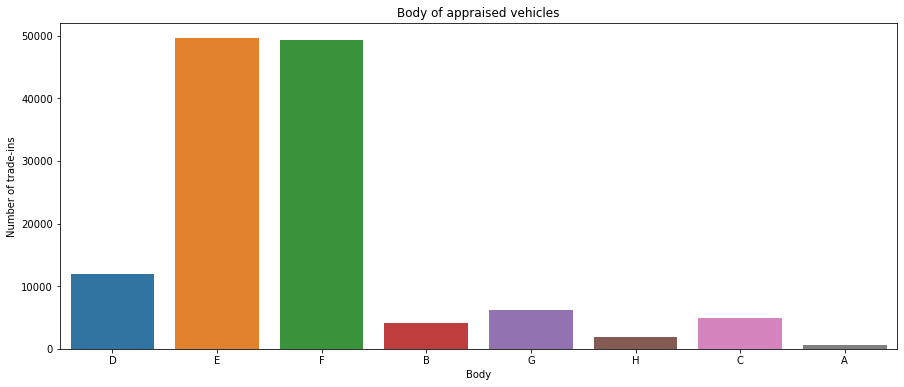

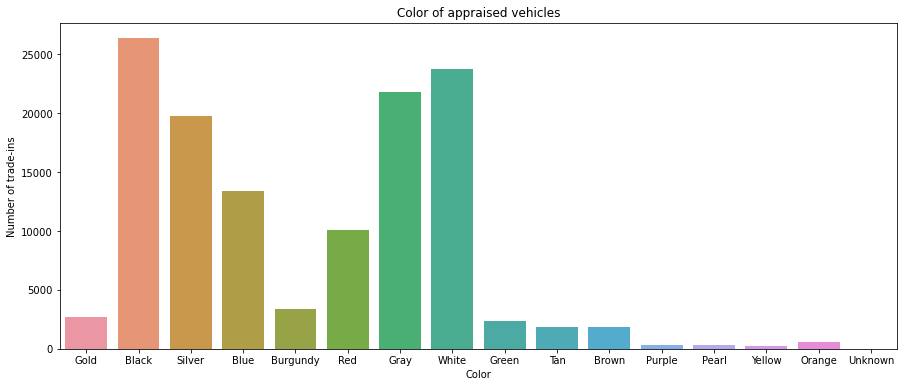

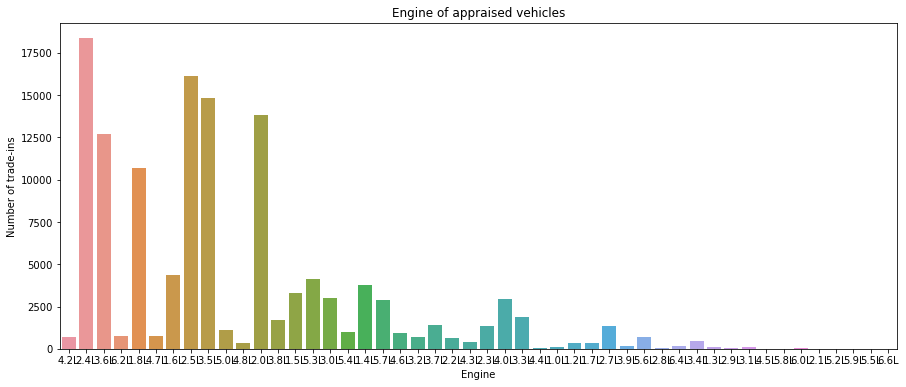

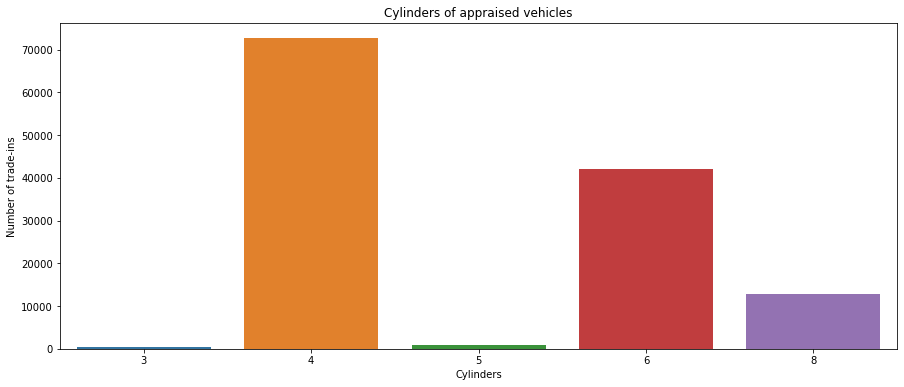

In [ ]:
import seaborn as sns

# create a bar chart of the body of the appraised vehicles
sns.countplot(x='body_appraisal', data=data)
plt.xlabel("Body")
plt.ylabel("Number of trade-ins")
plt.title("Body of appraised vehicles")
plt.show()

# create a bar chart of the color of the appraised vehicles
sns.countplot(x='color_appraisal', data=data)
plt.xlabel("Color")
plt.ylabel("Number of trade-ins")
plt.title("Color of appraised vehicles")
plt.show()

# create a bar chart of the engine of the appraised vehicles
sns.countplot(x='engine_appraisal', data=data)
plt.xlabel("Engine")
plt.ylabel("Number of trade-ins")
plt.title("Engine of appraised vehicles")
plt.show()

# create a bar chart of the cylinders of the appraised vehicles
sns.countplot(x='cylinders_appraisal', data=data)
plt.xlabel("Cylinders")
plt.ylabel("Number of trade-ins")
plt.title("Cylinders of appraised vehicles")
plt.show()


In [ ]:
#Look at the online_appraisal_flag, to identify the customers who prefer to do the appraisal online, CarMax can improve its online appraisal process to provide more accurate and time-efficient appraisal offers.

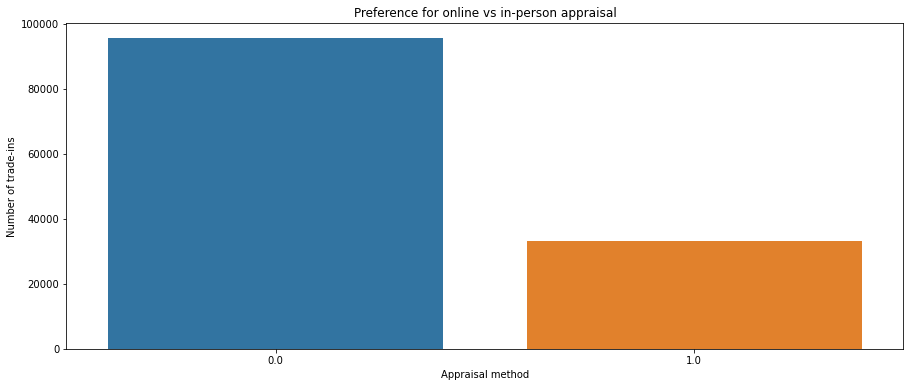

In [ ]:
import seaborn as sns

# create a bar chart of the online_appraisal_flag
sns.countplot(x='online_appraisal_flag', data=data)
plt.xlabel("Appraisal method")
plt.ylabel("Number of trade-ins")
plt.title("Preference for online vs in-person appraisal")
plt.show()


In [ ]:
#bar chart that shows the number of trade-ins where the online_appraisal_flag is 1 (online appraisal) and the number of trade-ins where the online_appraisal_flag is 0 (in-person appraisal). This will help you to identify the proportion of customers who prefer to do the appraisal online.

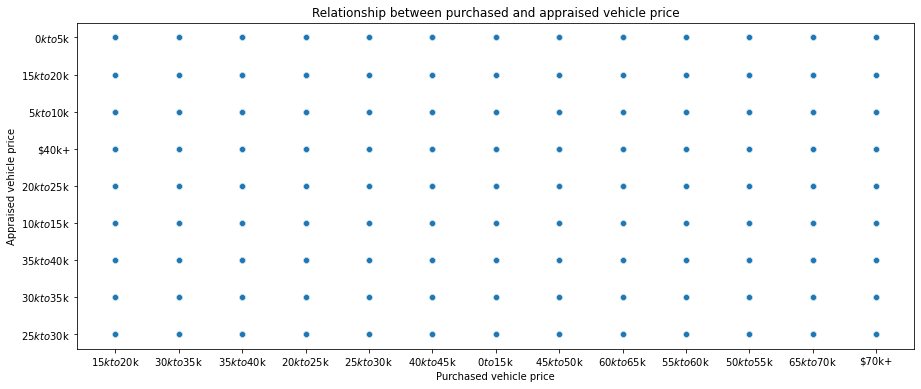

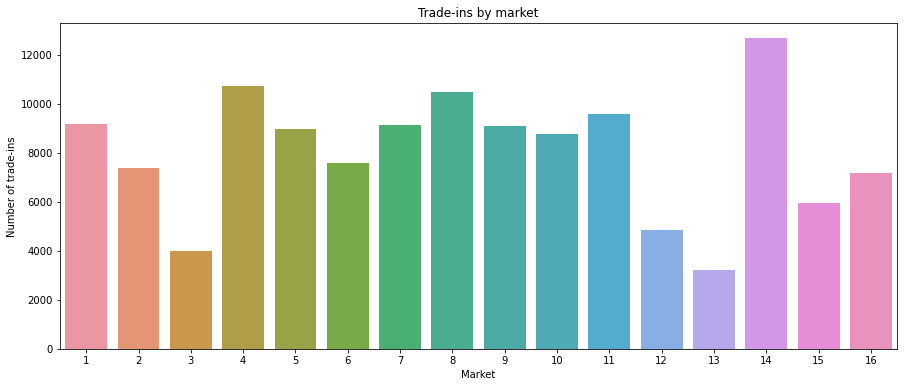

In [ ]:
import seaborn as sns

# create a scatter plot of the price and appraisal_offer
sns.scatterplot(x='price', y='appraisal_offer', data=data)
plt.xlabel("Purchased vehicle price")
plt.ylabel("Appraised vehicle price")
plt.title("Relationship between purchased and appraised vehicle price")
plt.show()

# create a bar chart of the market
sns.countplot(x='market', data=data)
plt.xlabel("Market")
plt.ylabel("Number of trade-ins")
plt.title("Trade-ins by market")
plt.show()


In [ ]:
#it would indicate that there is no clear relationship between the price of the purchased vehicle and the appraisal offer of the appraised vehicle. This could mean that customers are making trade-ins with a wide range of prices and appraisal offers, and there is no consistent pattern in the data.

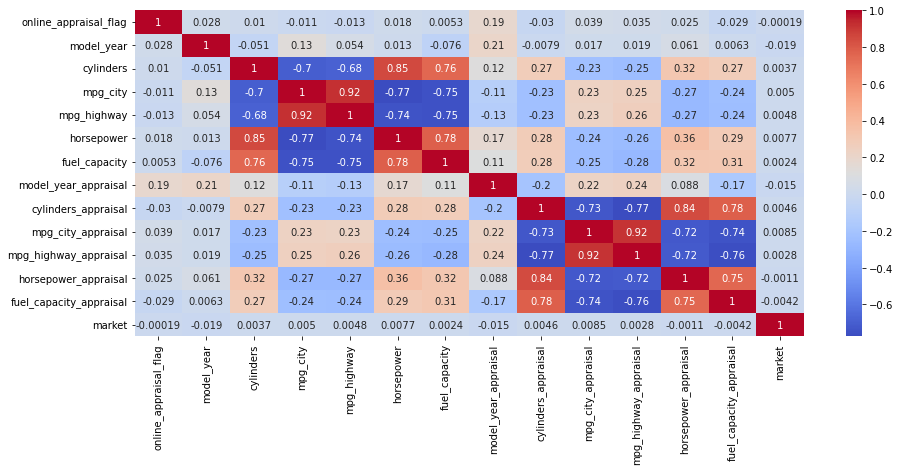

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate the correlation matrix
corr_matrix = data.corr()

# create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# display the plot
plt.show()


In [ ]:
import pandas as pd

# group the data by color and count the number of occurrences of each color
color_counts = data.groupby('color').size().reset_index(name='counts')

# sort the data by counts in descending order
color_counts = color_counts.sort_values(by='counts', ascending=False)

# print the most common color
print("The most sold car color is:", color_counts.iloc[0]['color'])


The most sold car color is: White


In [ ]:
df.columns

Index(['price', 'appraisal_offer', 'online_appraisal_flag', 'model_year',
       'mileage', 'make', 'model', 'trim_descrip', 'body', 'color', 'engine',
       'cylinders', 'mpg_city', 'mpg_highway', 'horsepower', 'fuel_capacity',
       'model_year_appraisal', 'mileage_appraisal', 'make_appraisal',
       'model_appraisal', 'trim_descrip_appraisal', 'body_appraisal',
       'color_appraisal', 'engine_appraisal', 'cylinders_appraisal',
       'mpg_city_appraisal', 'mpg_highway_appraisal', 'horsepower_appraisal',
       'fuel_capacity_appraisal', 'market'],
      dtype='object')